# Simple Linear Regression — Class Activity (Group Work)

**Work with your final-project group** (you already know your teammates). One notebook per group is fine.

We will analyze a **real class survey dataset** and practice simple linear regression: choosing a dependent variable (**Y**) and one predictor (**X**), visualizing the relationship, estimating the line, and interpreting the slope.

> ⚠️ **Note**: This is a pedagogical exercise. The dataset is anonymous and used only within this class session.


**Our group is Eshan Momin, Howie Brown, Ashley Mazarin, and Caleigh Shapiro**

## 🧰 Imports (keep all packages here)
Keeping **all imports in one cell** makes your notebook reproducible and easy to audit. If you need new packages later, **come back** and add them here.


In [2]:
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Display options
pd.set_option("display.max_columns", 50)
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.grid"] = True


In [2]:
!pip install openpyxl # For reading Excel files

## 📥 Load the survey data & set column names (short camelCase)

Below we show **two steps**:
1) **Auto-shortener**: create machine-made camelCase names from long question text (safe fallback).  
2) **Optimized names**: apply concise 1–5 word camelCase labels (we'll provide a codebook).

> Replace `data_path` with your actual file path if needed.


In [3]:
# --- Path to your Excel file ---
data_path = "survey.xlsx"  # <- update if needed

# --- Load raw file (first row already contains the long questions as column names) ---
df_raw = pd.read_excel(data_path)
print("Raw columns:", list(df_raw.columns))
display(df_raw.head())


Raw columns: ['Timestamp', 'How many hours of sleep did you get last night? ', '  How many cups of coffee (or tea / energy drinks / mysterious liquids) have you consumed today?  ', '  On a scale from 1 to 10, how energetic do you feel right now?  ', '  How many hours per day do you spend on social media (Instagram, TikTok, LinkedIn if you’re fancy, etc.)?  ', '  How many titk toks, reels, memes, did you share last week? (Number. Honesty is optional, but recommended.)  ', '  On a scale from 1 to 10, how confident are you in public speaking?  ', '  If you have a part-time job: how many hours per week do you work? (Number. If none, type 0 and enjoy your free time.) ', '  How stressed do you feel on a scale from 1?  ', '  How long is your commute to campus (in minutes)?  ', '  How many siblings do you have? (If you lost count, just estimate.)', 'How patient are you, really?  ', 'How many languages do you speak (fluently, or at least confidently enough to order food)?  ']


,Timestamp,How many hours of sleep did you get last night?,How many cups of coffee (or tea / energy drinks / mysterious liquids) have you consumed today?,"On a scale from 1 to 10, how energetic do you feel right now?","How many hours per day do you spend on social media (Instagram, TikTok, LinkedIn if you’re fancy, etc.)?","How many titk toks, reels, memes, did you share last week? (Number. Honesty is optional, but recommended.)","On a scale from 1 to 10, how confident are you in public speaking?","If you have a part-time job: how many hours per week do you work? (Number. If none, type 0 and enjoy your free time.)",How stressed do you feel on a scale from 1?,How long is your commute to campus (in minutes)?,"How many siblings do you have? (If you lost count, just estimate.)","How patient are you, really?","How many languages do you speak (fluently, or at least confidently enough to order food)?"
0,2025-09-18 15:51:15.502,5,1.0,7,2.0,20.0,8.0,0.0,5.0,3.0,4.0,8,3.0
1,2025-09-18 18:05:06.887,3,NaN,6,NaN,NaN,NaN,NaN,6.0,NaN,NaN,3,NaN
2,2025-09-19 11:32:59.637,8,1.0,8,3.0,50.0,9.0,0.0,6.0,2.0,1.0,8,2.0
3,2025-09-19 11:34:36.675,7,1.0,8,5.0,0.0,4.0,5.0,7.0,7.0,1.0,9,2.0
4,2025-09-19 11:35:18.522,8,1.0,7,3.0,4.0,8.0,0.0,1.0,3.0,1.0,9,3.0


Run the below cell to make the column names cleaner and short (trust me, fam).

In [4]:
# Drop the timestamp column (assuming it's the first one)
df = df_raw.drop(columns=[df_raw.columns[0]])

# Desired short names for the remaining columns (in order)
short_names = [
    "sleepHours",
    "coffeeCups",
    "energyLevel",
    "socialMediaHours",
    "memesShared",
    "publicSpeakingConf",
    "jobHours",
    "stressLevel",
    "commuteMinutes",
    "siblingsCount",
    "patienceLevel",
    "languagesSpoken"
]

# Apply new column names
df.columns = short_names

print("Final column names:", list(df.columns))
df.head()


Final column names: ['sleepHours', 'coffeeCups', 'energyLevel', 'socialMediaHours', 'memesShared', 'publicSpeakingConf', 'jobHours', 'stressLevel', 'commuteMinutes', 'siblingsCount', 'patienceLevel', 'languagesSpoken']


,sleepHours,coffeeCups,energyLevel,socialMediaHours,memesShared,publicSpeakingConf,jobHours,stressLevel,commuteMinutes,siblingsCount,patienceLevel,languagesSpoken
0,5,1.0,7,2.0,20.0,8.0,0.0,5.0,3.0,4.0,8,3.0
1,3,NaN,6,NaN,NaN,NaN,NaN,6.0,NaN,NaN,3,NaN
2,8,1.0,8,3.0,50.0,9.0,0.0,6.0,2.0,1.0,8,2.0
3,7,1.0,8,5.0,0.0,4.0,5.0,7.0,7.0,1.0,9,2.0
4,8,1.0,7,3.0,4.0,8.0,0.0,1.0,3.0,1.0,9,3.0


See how much cleaner the column names are now!

## 🎯 Choose your variables: Y and X

- **Y (dependent variable)**: the outcome you want to explain.  
- **X (independent variable)**: a predictor that may influence Y.  

You may be tempted to argue causality, but with a quick classroom dataset we’ll mostly get **descriptive correlations**. That’s fine—this is about learning how simple regression works.

**Use the codebook** (long question → short column name) to choose your variables.

**Write below (be concise):**
- What is your **Y**?
- What is your **X**?
- **Hypothesis:** Do you think Y and X will have a positive or negative relationship (why)?


**Answer (group):**  
_Y = ..._  Energy Level
_X = ..._  Sleep Hours
_Hypothesis (expected sign/magnitude & reasoning): ..._ There will be a positive relationship between sleep hours and energy level


---
## Exercise 1 — Scatterplot with best-fit line

**Goal:** Visualize your chosen relationship and overlay the best-fitting straight line.

**Your prompt for an AI assistant (copy/edit):**  
> “Give me Python/matplotlib code to plot a scatter of **Y vs X** from a pandas DataFrame named `df`, and overlay the **least-squares fitted line**. Assume variables are `y_var` and `x_var` strings containing the column names.”

**Remember:** Adapt any AI code to your actual variable names in `df`.


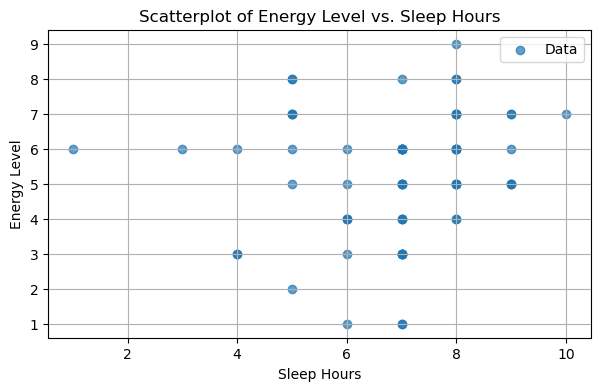

In [6]:
# Extract variables
x = df["sleepHours"]
y = df["energyLevel"]

# Fit least-squares line
m, b = np.polyfit(x, y, 1)

# Plot scatter
plt.scatter(x, y, alpha=0.7, label="Data")


# Labels and title
plt.xlabel("Sleep Hours")
plt.ylabel("Energy Level")
plt.title("Scatterplot of Energy Level vs. Sleep Hours")
plt.legend()
plt.show()


---
## Exercise 2 — Estimate the simple regression

**Goal:** Use `statsmodels` to run a simple OLS regression of **Y** on **X** and inspect the output.

**Your prompt for an AI assistant (copy/edit):**  
> “Give me Python code using `statsmodels` to run an OLS regression of **Y** on **X** from a pandas DataFrame named `df`.  
> Assume my chosen variables are stored in `y_var` and `x_var` strings, and I want to see the regression summary.”

**Remember:**  
- Adapt any AI code to match your actual variable names in `df`.  
- Make sure you have `import statsmodels.formula.api as smf` at the top of your notebook. 


In [7]:
# your code here
import statsmodels.formula.api as smf

# OLS: energyLevel = β0 + β1 * sleepHours + ε
model = smf.ols("energyLevel ~ sleepHours", data=df, missing="drop")
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            energyLevel   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.306
Date:                Fri, 19 Sep 2025   Prob (F-statistic):              0.257
Time:                        13:22:18   Log-Likelihood:                -132.86
No. Observations:                  67   AIC:                             269.7
Df Residuals:                      65   BIC:                             274.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1877      0.971      4.314      0.0

---
## Exercise 3 — Interpret your results (short paragraph)

**Answer (group):**  
- **Slope (β₁):** In words, what does the slope mean for your variables? (e.g., “An extra hour of sleep is associated with +0.4 higher energy score.”)  
- **Sign & magnitude:** Does the sign and size match your **hypothesis** above?  
- **Fit:** Does the R² suggest a tight or loose relationship (for this sample)?  
- **Caveat:** Any reasons this relationship might not be causal here?


<hr />

<p style="text-align: center;">ECON320 Python Programming Laboratory</a></p>
<p style="text-align: center;">Instructor <em> Guido Anthony Romero</em></a></p>
<p style="text-align: center;"><span style="color: #6666FF;"><em>guido.romero@emory.edu</em></span></p>

<p style="text-align: center;">Department of Economics</a></p>
<p style="text-align: center;">Emory University</a></p>

&nbsp;

The slope means that for each additional hour of sleep, there is an increas in energy level by .157. 

The slope is positive, so more sleep is linked to higher energy level, but the magnitude is small and not statistically significant. 

The fit is very loose - .02 of the variation in energy levels is from sleep hours. 

I think most of the reason this is not causal is due to the dataset. There are very few observations, also only taken at one point in time. There are also other factors like excercise, time of year, general stress. 